<a href="https://colab.research.google.com/github/M123shashank/Capstone-1_Hotel-Booking-Analysis/blob/main/Individual_Notebook_Hotel_Booking_Analysis_Shashank_mishra__Team_overview_archives_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Hotel Booking Analysis is on of my personal favourite topics and that's why I enjoyed working and doing EDA's over it. 

This is because in my previous job, I came to know little bit about my company's guesthouse bookings also and even I managed the well known Asiatech booking software too for some days. During the work, I came to understand how bookings happen, how we can make our presence over online platforms like Make my trip, agoda, etc. Also, I came across the details which we take from the customer, the details we give to the customer in booking voucher, performance of hotel month-wise, etc.

I am very excited to work with python on this interesting topic and exploring different aspects which may improve bookings in future. 

Let's begin... 

# **Recognising the data:**

---



---


In [ ]:
#let us import all the libraries in the beginning itself
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mount the google drive for the colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the csv data file from drive
hotel_df= pd.read_csv('/content/drive/MyDrive/Shashank Mishra - Hotel Booking Analysis/Hotel Bookings.csv')

In [ ]:
#check the decoration
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# let us take a look of first 5 rows of data
hotel_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [ ]:
# let us take a look of last 8 rows of data
hotel_df.tail(8)

hotel  is_canceled  lead_time  arrival_date_year  \
119382  City Hotel            0        135               2017   
119383  City Hotel            0        164               2017   
119384  City Hotel            0         21               2017   
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119382             August                        35   
119383             August                        35   
119384             August                        35   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119382                         30                        2   
119383                         31                        2   
119384                         30                        2   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
119382                     4       3  ...    No Deposit    7.0     NaN   
119383                     4       2  ...    No Deposit   42.0     NaN   
119384                     5       2  ...    No Deposit  394.0     NaN   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
119382                    0     Transient  209.00   
119383                    0     Transient   87.60   
119384                    0     Transient   96.14   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119382                            0                          0   
119383                            0                          0   
119384                            0                          2   
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

        reservation_status reservation_status_date  
119382           Check-Out              2017-09-05  
119383           Check-Out              2017-09-06  
119384           Check-Out              2017-09-06  
119385           Check-Out              2017-09-06  
119386           Check-Out              2017-09-07  
119387           Check-Out              2017-09-07  
119388           Check-Out              2017-09-07  
119389           Check-Out              2017-09-07  

[8 rows x 32 columns]

In [ ]:
#find the number of rows and columns 
hotel_df.shape

(119390, 32)

In [ ]:
#let us check the various aspects info about the data
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

It looks there is some missing data for columns like children, country, agent, company, etc. Also, the data type as 'object' stands for a text.

In [ ]:
# let us check the descriptive info about the data
hotel_df.describe()


is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [ ]:
hotel_df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [ ]:
hotel_df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
hotel_df.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
hotel_df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
hotel_df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
hotel_df['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [ ]:
hotel_df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
hotel_df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
hotel_df.is_repeated_guest.unique() 

array([0, 1])

In [ ]:
hotel_df.is_repeated_guest

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_repeated_guest, Length: 119390, dtype: int64

In [ ]:
hotel_df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
hotel_df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
hotel_df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
hotel_df.customer_type .unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
hotel_df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

Let us try to analyse the type of data stored in various columns:
1. Columns/Variables having textual values(Categorical data):

  i. hotel: type of hotel ('Resort Hotel', 'City Hotel')

  ii. arrival_date_month : arrival calendar month.

  iii. meal: The values include
               These indicate the board basis booked:

              - RO: Room only

              - BB: Bed & Breakfast

              - HB: Half Board (Breakfast and Dinner normally)

              - FB: Full Board (Beakfast, Lunch and Dinner)

              - SC: Self-catering 

  iv. Country: Names of countries in short form.

  v. market_segment: 'Direct', 'Corporate', 'Online TA'(Traveling Agency), 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation'

  vi. distribution_channel: It shows us the sector through which we got the booking like, 'Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'.

  vii. is_repeated_guest: guest repaeted or not. 1 for yes, 0 for No.

  viii. reserved_room_type: Wing of the room like 'A', 'B", etc. for reserved rooms.

   ix. assigned_room_type: Wing of the room like 'A', 'B", etc. for assigned rooms.

   x. deposit_type: type of deposit like 'No Deposit', 'Refundable', 'Non Refund'.

   xi. customer_type : type of the customer like transient, etc.

   xii. reservation_status: values are 'Check-Out', 'Canceled', 'No-Show'.

   xiii. reservation_status_date: date of reservation in textual format.

   All other columns have data is in numerical form i.e. Numerical data. 'adr' stands for average daily rate, which measures the average rental revenue earned for an occupied room per day.

In [ ]:
#before going further, it's important to create a copy of the database.
hotel_c= hotel_df.copy()

# **Clean the data**

---



---


Cleaning data is very important task to be performed to free the data from many future issues which may come while performing the coding tasks.

Let us clean our data using many steps.

**i) : Modifying missing values.**

In [ ]:
# Columns having missing values.
hotel_c.isnull().sum().sort_values(ascending = False)[:8]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
booking_changes            0
deposit_type               0
dtype: int64

Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer did not booked hotel via any agent or via any company. So in that case value can be null under these columns. We will replace null values by 0 in these columns.

Also, the countries name may not been filled by data collector and hence, it is also missing. In short, 4 columns have missing data.

In [ ]:
hotel_c[['company','agent']] = hotel_c[['company','agent']].fillna(0)

In [ ]:
hotel_c['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.  So, 'nan' values are the missing values due to error of recording data. We will replace the null values under this column with mean value of children.

In [ ]:
hotel_c['children'].fillna(hotel_c['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of origin of customer. Since, this column has datatype of string. We will replace the missing value with the mode of 'others' column.

In [ ]:
hotel_c['country'].fillna('others', inplace = True)

In [ ]:
# Check if all null values are removed
hotel_c.isnull().sum().sort_values(ascending = False)[:8]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [ ]:
hotel_c[hotel_c['adults']+hotel_c['babies']+hotel_c['children'] == 0].shape

(180, 32)

In [ ]:
hotel_c.drop(hotel_c[hotel_c['adults']+hotel_c['babies']+hotel_c['children'] == 0].index, inplace = True)

 **i): Removing duplicate rows**

In [ ]:
# Let us see the duplicate rows count
hotel_c[hotel_c.duplicated()].shape

(31980, 32)

In [ ]:
# remove the duplicate values using drop
hotel_c.drop_duplicates(inplace = True)

In [ ]:
hotel_c.shape

(87230, 32)

**iii): Converting columns to appropriate datatypes.**

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hotel_c[['children', 'company', 'agent']] = hotel_c[['children', 'company', 'agent']].astype('int64')

In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
hotel_c['reservation_status_date'] = pd.to_datetime(hotel_c['reservation_status_date'], format = '%Y-%m-%d')

In [ ]:
hotel_c.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0      0       0                    0     Transient   0.0   
1      0       0                    0     Transient   0.0   
2      0       0                    0     Transient  75.0   
3    304       0                    0     Transient  75.0   
4    240       0                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

**iv): Adding important columns**

In [ ]:
# Adding total staying days in hotels
hotel_c['total_stay'] = hotel_c['stays_in_weekend_nights']+hotel_c['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
hotel_c['total_people'] = hotel_c['adults']+hotel_c['children']+hotel_c['babies']

For analysis of the stay length at hotels, we have added these columns.

# **Exploratory Data Analysis:**

---



---



Lets start with defining the correlation between the numerical data.

Many of the cilumns don't need to be checked for co-relation. Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. 

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [ ]:
hotel_cor= hotel_c[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr']]

In [ ]:
#this code will store & show co-relation matrix
corrmat = hotel_cor.corr()
corrmat

lead_time  previous_cancellations  \
lead_time                        1.000000                0.005370   
previous_cancellations           0.005370                1.000000   
previous_bookings_not_canceled  -0.079021                0.391766   
booking_changes                  0.080822               -0.010267   
days_in_waiting_list             0.131909                0.003733   
adr                              0.021948               -0.050359   

                                previous_bookings_not_canceled  \
lead_time                                            -0.079021   
previous_cancellations                                0.391766   
previous_bookings_not_canceled                        1.000000   
booking_changes                                       0.005774   
days_in_waiting_list                                 -0.006334   
adr                                                  -0.086052   

                                booking_changes  days_in_waiting_list  \
lead_time                              0.080822              0.131909   
previous_cancellations                -0.010267              0.003733   
previous_bookings_not_canceled         0.005774             -0.006334   
booking_changes                        1.000000              0.024143   
days_in_waiting_list                   0.024143              1.000000   
adr                                    0.010144             -0.032522   

                                     adr  
lead_time                       0.021948  
previous_cancellations         -0.050359  
previous_bookings_not_canceled -0.086052  
booking_changes                 0.010144  
days_in_waiting_list           -0.032522  
adr                             1.000000

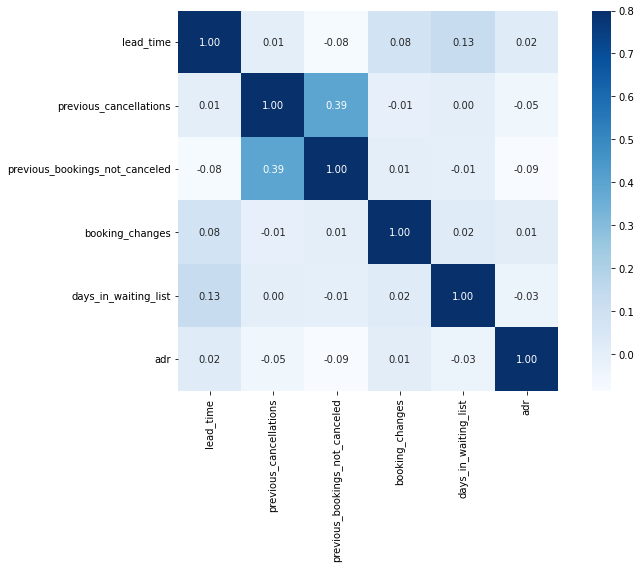

In [ ]:
#showing the heat map
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, cmap= 'Blues', square=True);

The light colour defines co-relation lesser than 1.
The more the co-realtion is, the darker the color is. and vice-versa.

1) The previous_bookings_not_canceled and lead_time have slight correlation. The reason is very obvious because if people book the hotel only few days before, there is lesser possibility of cancellation.

2) The adr is slightly correlated with previous_cancellations, which makes sense as less no. of people means less revenue, therefore less adr.

Let's see does length of stay affects the adr.

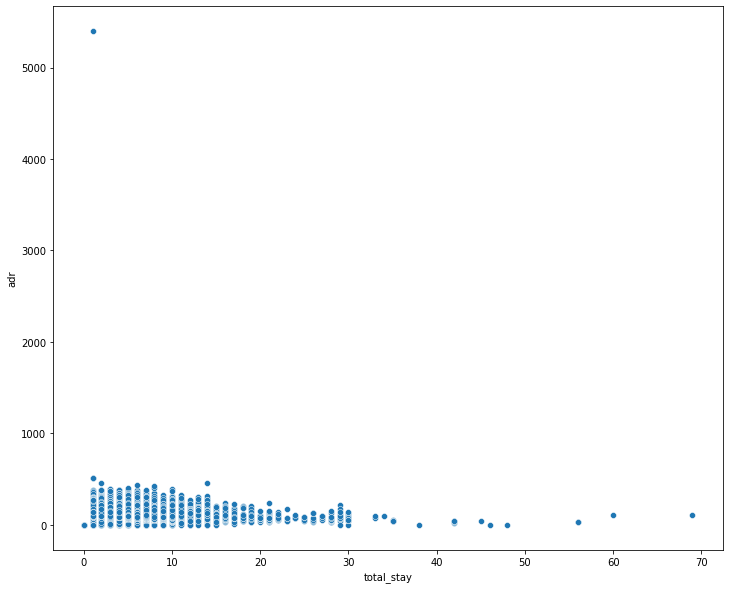

In [ ]:
# Shows figure size and plot.
plt.figure(figsize = (12,10))
sns.scatterplot(y = 'adr', x = 'total_stay',  data = hotel_c)
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [ ]:
hotel_c.drop(hotel_c[hotel_c['adr'] > 5000].index, inplace = True)

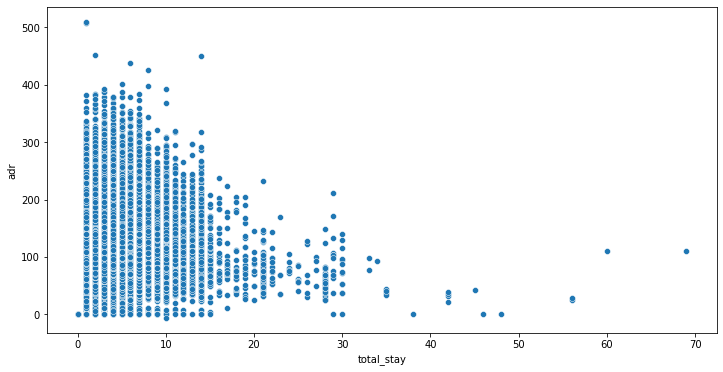

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hotel_c, )
plt.show()

From the scatter plot we can see that as length of the total_stay increases the adr decreases. This means for the longer stay, the better deal for customer can be finalised. Offers can also be given to the customer for longer stays.

## ***Univariate Analysis***

---



---

**Q1) Which meal type is most liked meal of customers?**

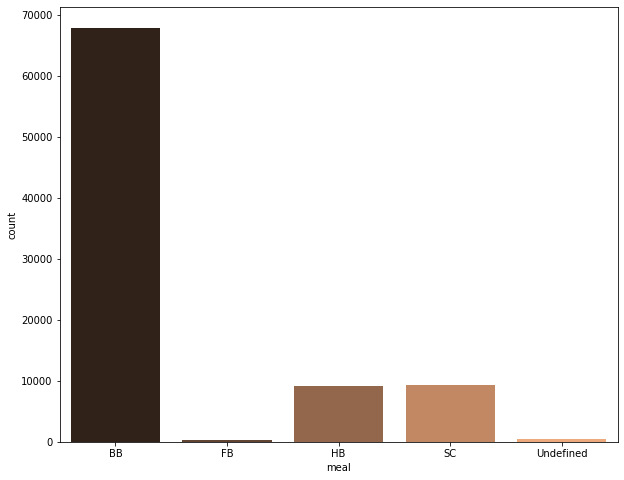

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = hotel_c['meal'], palette = 'copper')
plt.show()

Most liked meal type is BB (Bed and breakfast).

**Q2) Which agent makes most no. of bookings?**

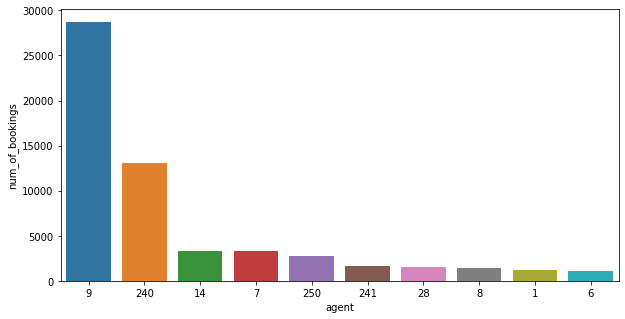

In [ ]:
# 0 represents that booking is not made by an agent
# Selecting top 10 performing agents

d_1 = pd.DataFrame(hotel_c['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d_1.drop(d_1[d_1['agent'] == 0].index, inplace = True)      
d_1 = d_1[:10]                                                  
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d_1, order = d_1.sort_values('num_of_bookings', ascending = False).agent)

**Q3) Which room type is in most demand and which room type generates highest adr?**

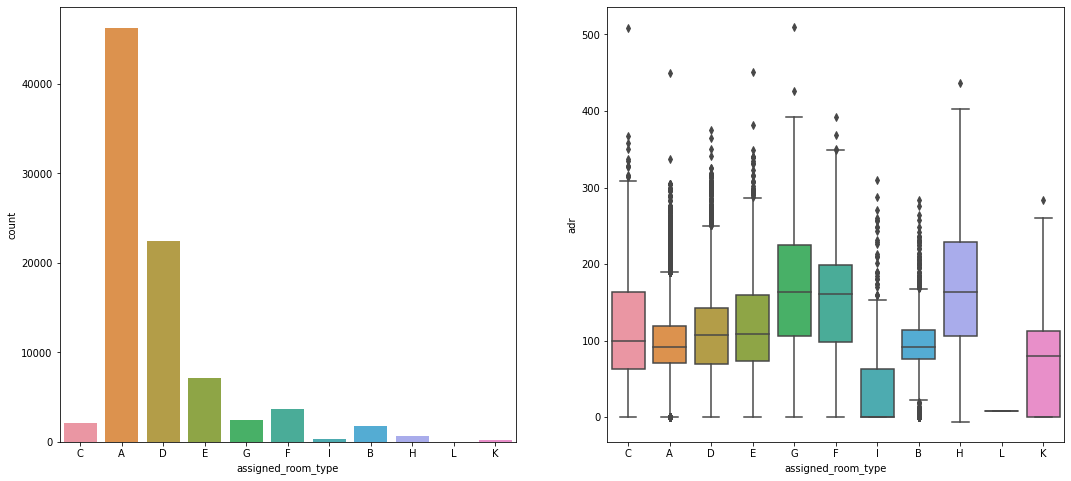

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = hotel_c.groupby('assigned_room_type')
d_1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = hotel_c['assigned_room_type'])
sns.boxplot(ax = axes[1], x = hotel_c['assigned_room_type'], y = hotel_c['adr'])
plt.show()

# **Hotel wise analysis**

---



---

**Q1) What is a percentage of bookings in each hotel?**

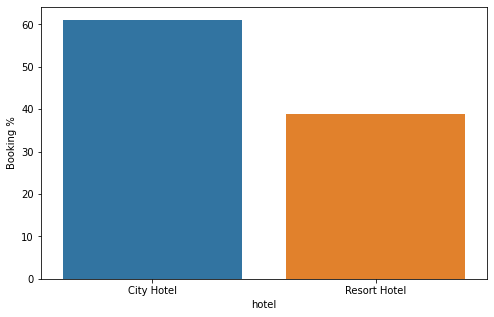

In [ ]:
#Calculating percentage
grouped_by_hotel = hotel_c.groupby('hotel')
d_1 = pd.DataFrame((grouped_by_hotel.size()/hotel_c.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})
plt.figure(figsize = (8,5))
sns.barplot(x = d_1['hotel'], y = d_1['Booking %'] )
plt.show()

The percentage of booking for city hotel is 60% and looks like 40% for resort hotel.

**Q2) which hotel seems to make more revenue?**

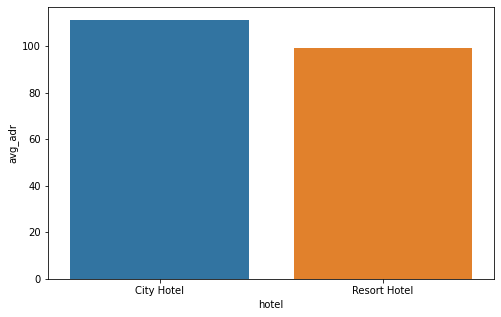

In [ ]:
# calculating average adr
d_2 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})  
plt.figure(figsize = (8,5))
sns.barplot(x = d_2['hotel'], y = d_2['avg_adr'] )
plt.show()

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

**Q3) What is preferred stay length in each hotel?**

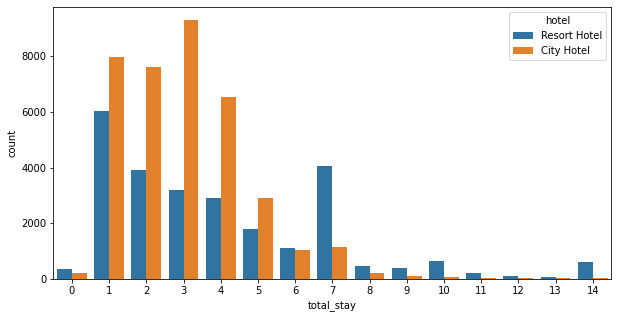

In [ ]:
not_canceled = hotel_c[hotel_c['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

**Q4) Which hotel has higher lead time?**

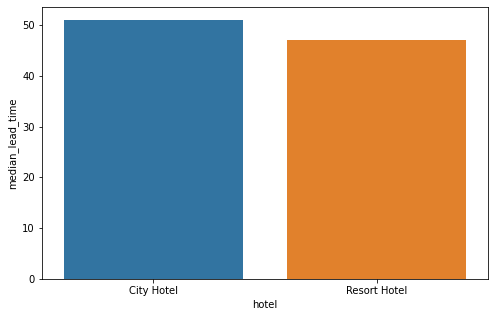

In [ ]:
d_3 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d_3['hotel'], y = d_3['median_lead_time'] )
plt.show()

City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

**Q5) Which hotel has high chance that its customer will return for another stay?**

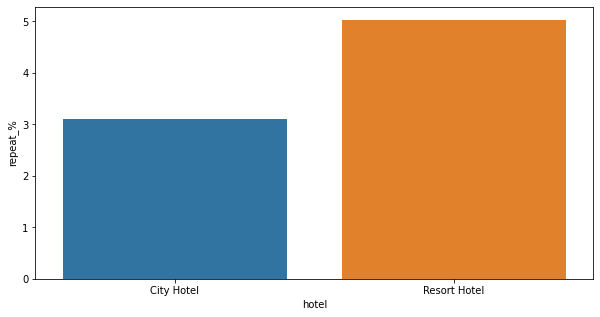

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = hotel_c[hotel_c['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D_1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D_2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D_3 = pd.concat([D_1,D_2], axis = 1)

# Calculating repeat %
D_3['repeat_%'] = round((D_3['total_repeated_guests']/D_3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D_3.index, y = D_3['repeat_%'])
plt.show()

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.

**Q6) Which hotel has longer waiting time?**

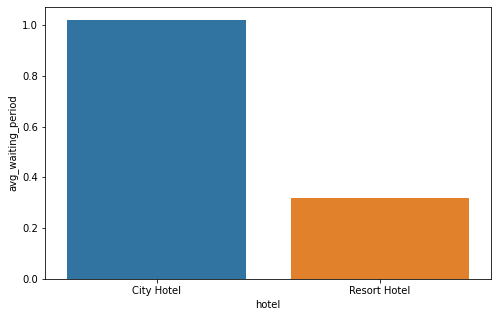

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
d_6 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d_6['hotel'], y = d_6['avg_waiting_period'] )
plt.show()

**Q7) Which hotel has higher bookings cancellation rate.**

In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = hotel_c[hotel_c['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D_1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = hotel_c.groupby('hotel')
total_booking = grouped_by_hotel.size()
D_2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D_3 = pd.concat([D_1,D_2], axis = 1)

# Calculating cancel percentage 
D_3['cancel_%'] = round((D_3['total_cancelled_bookings']/D_3['total_bookings'])*100,2)
D_3

total_cancelled_bookings  total_bookings  cancel_%
hotel                                                           
City Hotel                       16034           53273     30.10
Resort Hotel                      7974           33956     23.48

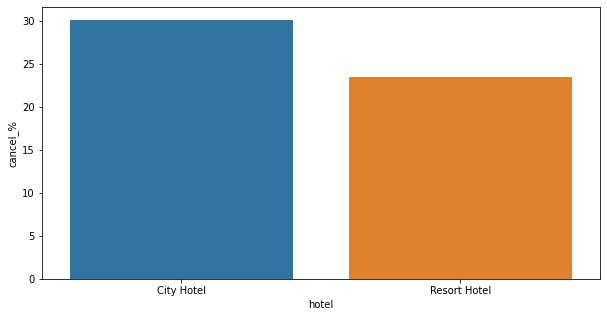

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D_3.index, y = D_3['cancel_%'])
plt.show()

Almost 30 % of City Hotel bookings got canceled.

# **Distribution Channel wise Analysis**

---


---








**Q_1) Which is the most common channel for booking hotels?**

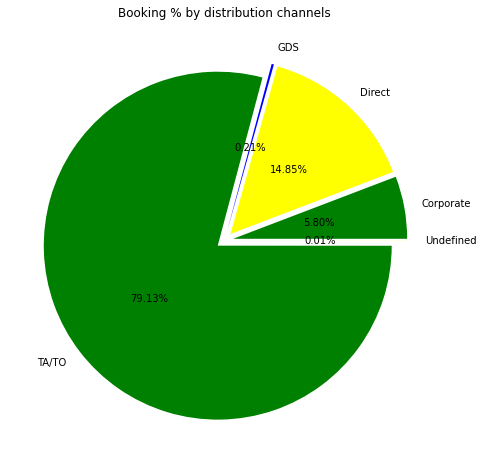

In [ ]:
group_by_dc = hotel_c.groupby('distribution_channel')
d_1 = pd.DataFrame(round((group_by_dc.size()/hotel_c.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d_1['Booking_%']
labels = d_1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5, colors ={'Green','yellow','blue'})
plt.title("Booking % by distribution channels", fontsize=12);

**Q2) Which channel is a mostly used for early booking of hotels?**

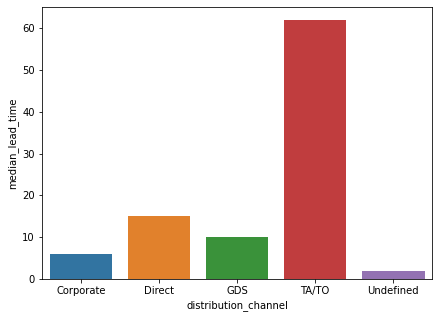

In [ ]:
group_by_dc = hotel_c.groupby('distribution_channel')
d_2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d_2['distribution_channel'], y = d_2['median_lead_time'])
plt.show()

TA/TO is mostly used for a planning Hotel visits ahead of time. But for sudden visits other mediums are most preferred.

**Q3) Which channel has longer average waiting time?**

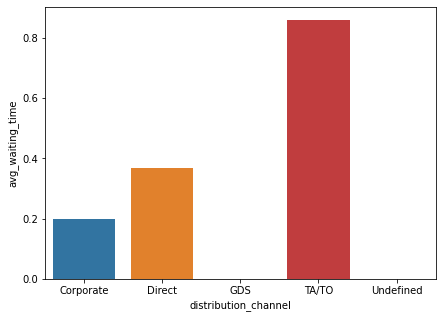

In [ ]:
d_4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d_4['distribution_channel'], y = d_4['avg_waiting_time'])
plt.show()

While booking via TA/TO one may be have to wait a little longer to confirm booking of rooms.

**Q4) Which distribution channel brings better revenue generating deals for hotels?**

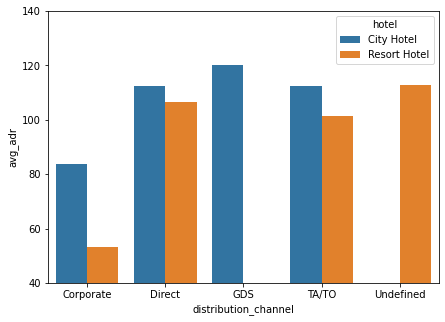

In [ ]:
group_by_dc_hotel = hotel_c.groupby(['distribution_channel', 'hotel'])
d_4 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d_4['distribution_channel'], y = d_4['avg_adr'], hue = d_4['hotel'])
plt.ylim(40,140)
plt.show()

The GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

A resort hotel has more revnue generating deals by direct and TA/TO channel. 
A resort Hotel need to increase outreach on GDS channel to increase revenue.

# **Booking cancellation Analysis**

---



---



---



Let us try to understand what causes the people to cancel the booking.

**Q1) Which significant distribution channel has highest cancellation percentage?**

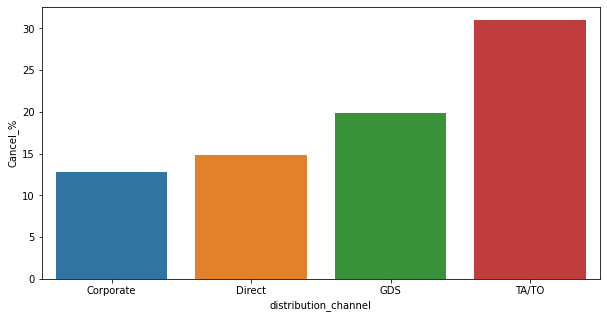

In [ ]:
d_1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d_1.index, y = d_1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

Let us see what causes the cancelation of bookings of rooms by a customers \ \ One question can arise that may be longer waiting period or longer lead time causes the cancellation of bookings, let us check that.

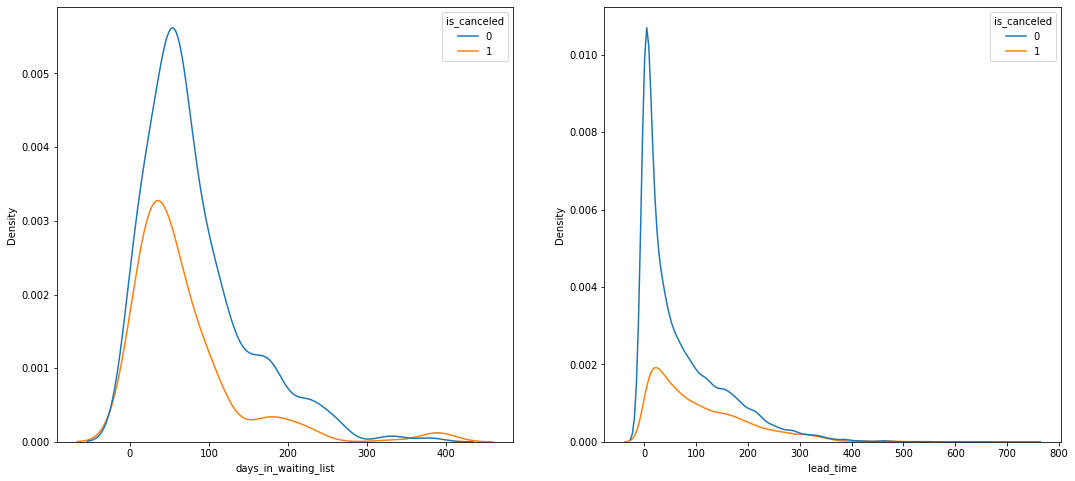

In [ ]:
# Selecting bookings with non zero waiting time
waiting_bookings = hotel_c[hotel_c['days_in_waiting_list'] !=0]  


fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings, color= 'red')
sns.kdeplot(ax = axes[1], x = hotel_c['lead_time'], hue = hotel_c['is_canceled'])
plt.show()


We see that most of the bookings that are cancelled have waiting period of the less 150 days but also most of the bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of a bookings. \ \ Also, lead time has no affect on cancellation of bookings, as both curves of cancelation and not cncelation are similar for lead time too.

Now we will be check whether not getting allotted the same room type as demanded is the cause of cancellation fo bookings

We see that not a getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

# **Time wise analysis**

---



---



---



In [ ]:
#Which are the most busy months?
d_month_ = hotel_c['arrival_date_month'].value_counts().reset_index()
d_month_.columns=['months','Number of guests']
d_month_
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d_month_['months'] = pd.Categorical(d_month_['months'], categories=months, ordered=True)
d_month_.sort_values('months').reset_index()

index     months  Number of guests
0      11    January              4685
1       8   February              6083
2       5      March              7488
3       3      April              7900
4       2        May              8344
5       4       June              7756
6       1       July             10043
7       0     August             11242
8       7  September              6682
9       6    October              6921
10     10   November              4973
11      9   December              5112

In [ ]:
data_resort = hotel_c[(hotel_c['hotel'] == 'Resort Hotel') & (hotel_c['is_canceled'] == 0)]
data_city = hotel_c[(hotel_c['hotel'] == 'City Hotel') & (hotel_c['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

month  price_for_resort  price_for_city_hotel
0       April         76.841664            114.251636
1      August        182.103524            122.825388
2    December         64.072826             90.769559
3    February         53.624311             88.210810
4     January         48.599615             83.378062
5        July        150.914540            120.069489
6        June        109.026942            120.673753
7       March         57.110018             91.306933
8         May         77.725129            124.825944
9    November         48.956548             88.271089
10    October         62.634853            105.517410
11  September         98.855456            116.973279

In [ ]:
resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

month  no of guests
0      August          4467
1        July          3834
2         May          3656
3        June          3477
4       March          3469
5       April          3325
6   September          3166
7     October          3070
8    February          2618
9    November          2177
10   December          2019
11    January          1961

In [ ]:
final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

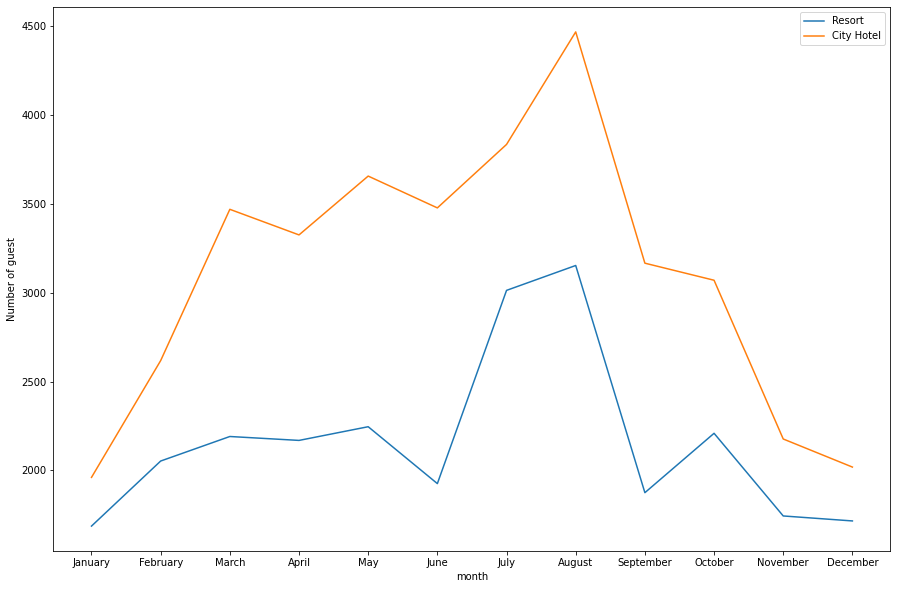

In [ ]:
#Which month get most visitors?
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
fig = plt.gcf()
fig.set_size_inches(15,10)

Most number of guest comes in month of August.

**Now lets see which month results in high revenue.**

In [ ]:
data_resort = hotel_c[(hotel_c['hotel'] == 'Resort Hotel') & (hotel_c['is_canceled'] == 0)]
data_city = hotel_c[(hotel_c['hotel'] == 'City Hotel') & (hotel_c['is_canceled'] == 0)]

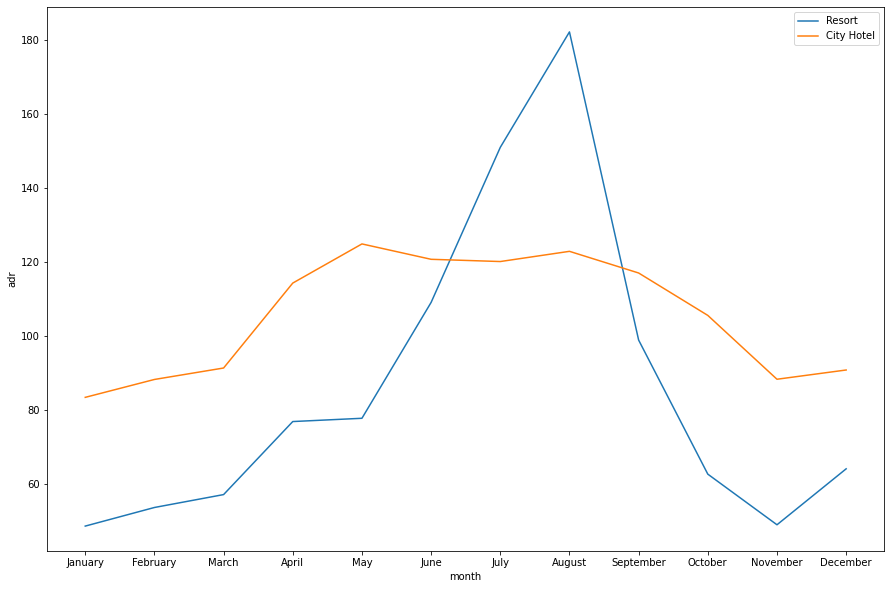

In [ ]:
resort_hotel_ = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel_.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()
sns.lineplot(data=final_hotel, x='month', y='price_for_resort')
sns.lineplot(data=final_hotel, x='month', y='price_for_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')
fig = plt.gcf()
fig.set_size_inches(15,10)

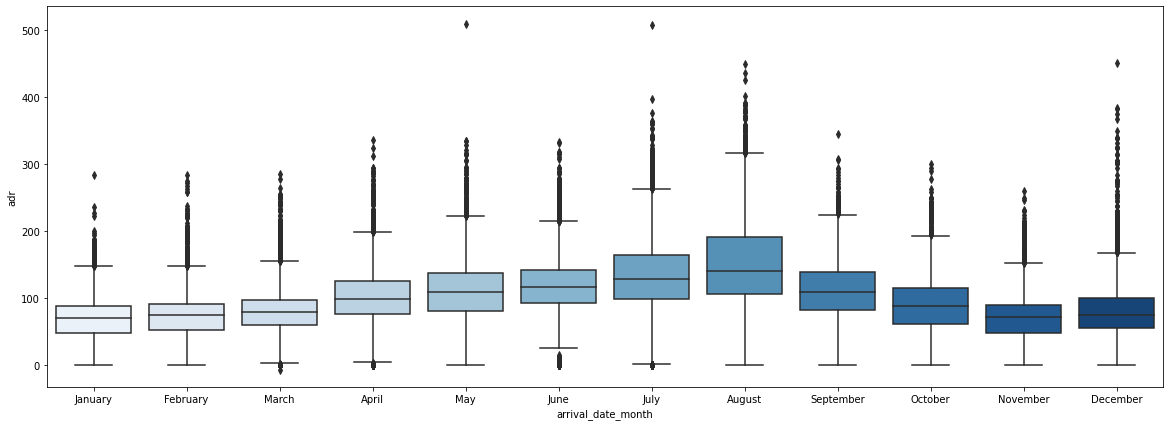

In [ ]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
hotel_c['arrival_date_month'] = pd.Categorical(hotel_c['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (20,7))
sns.boxplot(x = hotel_c['arrival_date_month'],y = hotel_c['adr'], palette="Blues")
plt.show()

Average adr rises from a beginning of year upto middle of year and reaches peak at August and then lowers to the end of the year. But hotels do make some good deals with high adr at end of year also.

**Now let us check the trend of arrival_num and avg adr within a month.**

---

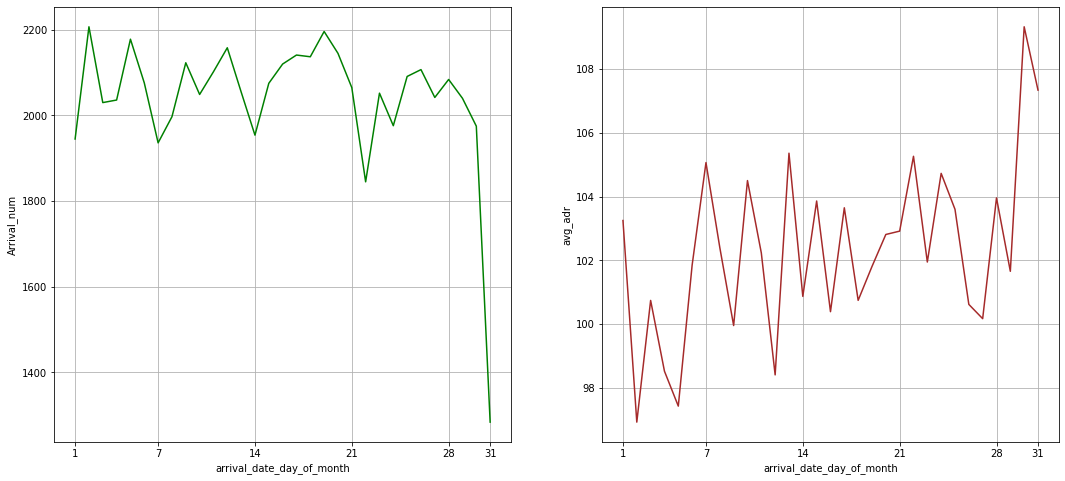

In [ ]:
d_6 = pd.DataFrame(not_canceled.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'Arrival_num'})
d_6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month

g = sns.lineplot(ax = axes[0],x = d_6.index, y = d_6['Arrival_num'], color = 'Green')
g.grid()
g.set_xticks([1,7,14,21,28,31])
g.set_xticklabels([1,7,14,21,28,31])

# Plotting avg adr for each day of month

h = sns.lineplot(ax = axes[1],x = d_6.index, y = d_6['avg_adr'], color='Brown')
h.grid()
h.set_xticks([1,7,14,21,28,31])
h.set_xticklabels([1,7,14,21,28,31])

plt.show()

We can see that graph Arrival_number has small peaks at regular interval of days. This can be due to increase in arrival weekend.\ \ Also the average adr tends to go up as month ends. Therefore charge more at the end of month.

### **Let us divide our customers in three categories of single, couple and family/friends. then check their booking %**

---


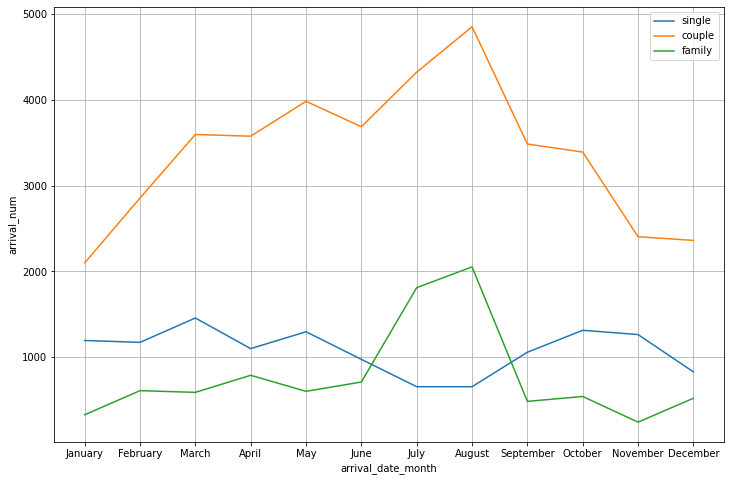

In [ ]:
## Select single, couple, multiple adults and family
single   = not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple   = not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family   = not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d_1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d_1['arrival_date_month'] = pd.Categorical(d_1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d_1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax, palette = 'copper')
  
plt.grid()
plt.show()

Mostly bookings are done by couples(although we are not sure that they are couple as data doesn't tell about that)

It is clear from the graph that their is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers.

## ***What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?***

---



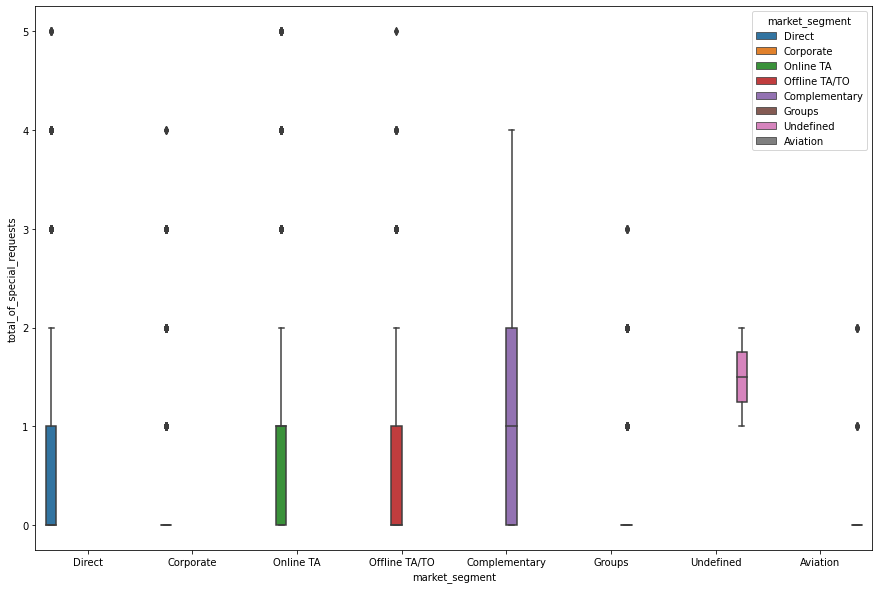

In [ ]:
## Special request according to market segment

sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= hotel_c)

fig = plt.gcf()
fig.set_size_inches(15,10)

This data shows that All of market segment mostly have special request.

## ***From where the most of guests are coming ?***

---



In [ ]:
country_wise_guests = hotel_c[hotel_c['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

country  No of guests
0       PRT         17573
1       GBR          8440
2       FRA          7091
3       ESP          5382
4       DEU          4332
..      ...           ...
161     ZMB             1
162     SYC             1
163     MDG             1
164     SMR             1
165     FRO             1

[166 rows x 2 columns]

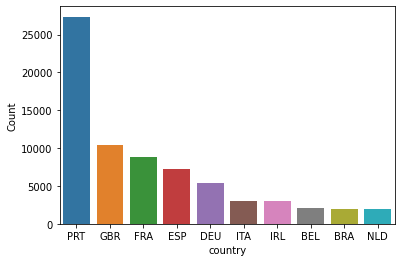

In [ ]:
grouped_by_country = hotel_c.groupby('country')
d_1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d_1['country'], y  = d_1['Count'])
plt.show()

Most of the guest are from Portugal and other Europian contries.

**How long do people stay at the hotels?**

In [ ]:
filter = hotel_c['is_canceled'] == 0
data = hotel_c[filter]
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...        0   
1                        0                     0       2  ...        0   
2                        0                     1       1  ...        0   
3                        0                     1       1  ...        0   
4                        0                     2       2  ...        0   

   days_in_waiting_list customer_type   adr required_car_parking_spaces  \
0                     0     Transient   0.0                           0   
1                     0     Transient   0.0                           0   
2                     0     Transient  75.0                           0   
3                     0     Transient  75.0                           0   
4                     0     Transient  98.0                           0   

  total_of_special_requests  reservation_status  reservation_status_date  \
0                         0           Check-Out               2015-07-01   
1                         0           Check-Out               2015-07-01   
2                         0           Check-Out               2015-07-02   
3                         0           Check-Out               2015-07-02   
4                         1           Check-Out               2015-07-03   

   total_stay total_people  
0           0            2  
1           0            2  
2           1            1  
3           1            1  
4           2            2  

[5 rows x 34 columns]

In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   days_in_waiting_list  customer_type   adr required_car_parking_spaces  \
0                     0      Transient   0.0                           0   
1                     0      Transient   0.0                           0   
2                     0      Transient  75.0                           0   
3                     0      Transient  75.0                           0   
4                     0      Transient  98.0                           0   

  total_of_special_requests reservation_status  reservation_status_date  \
0                         0          Check-Out               2015-07-01   
1                         0          Check-Out               2015-07-01   
2                         0          Check-Out               2015-07-02   
3                         0          Check-Out               2015-07-02   
4                         1          Check-Out               2015-07-03   

   total_stay  total_people total_nights  
0           0             2            0  
1           0             2            0  
2           1             1            1  
3           1             1            1  
4           2             2            2  

[5 rows x 35 columns]

In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

total_nights         hotel  Number of stays
0              0    City Hotel              218
1              0  Resort Hotel              350
2              1    City Hotel             7972
3              1  Resort Hotel             6036
4              2    City Hotel             7630
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]

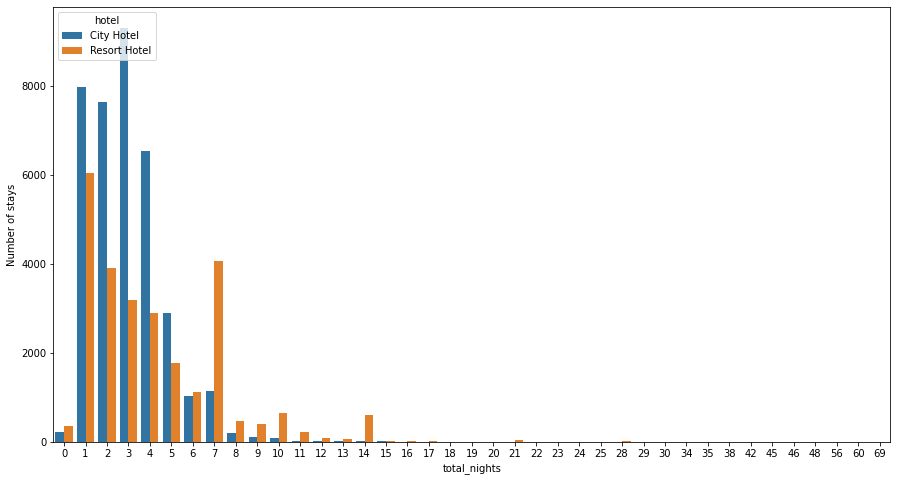

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

Most people prefer to stay at the hotels of <=5 days.

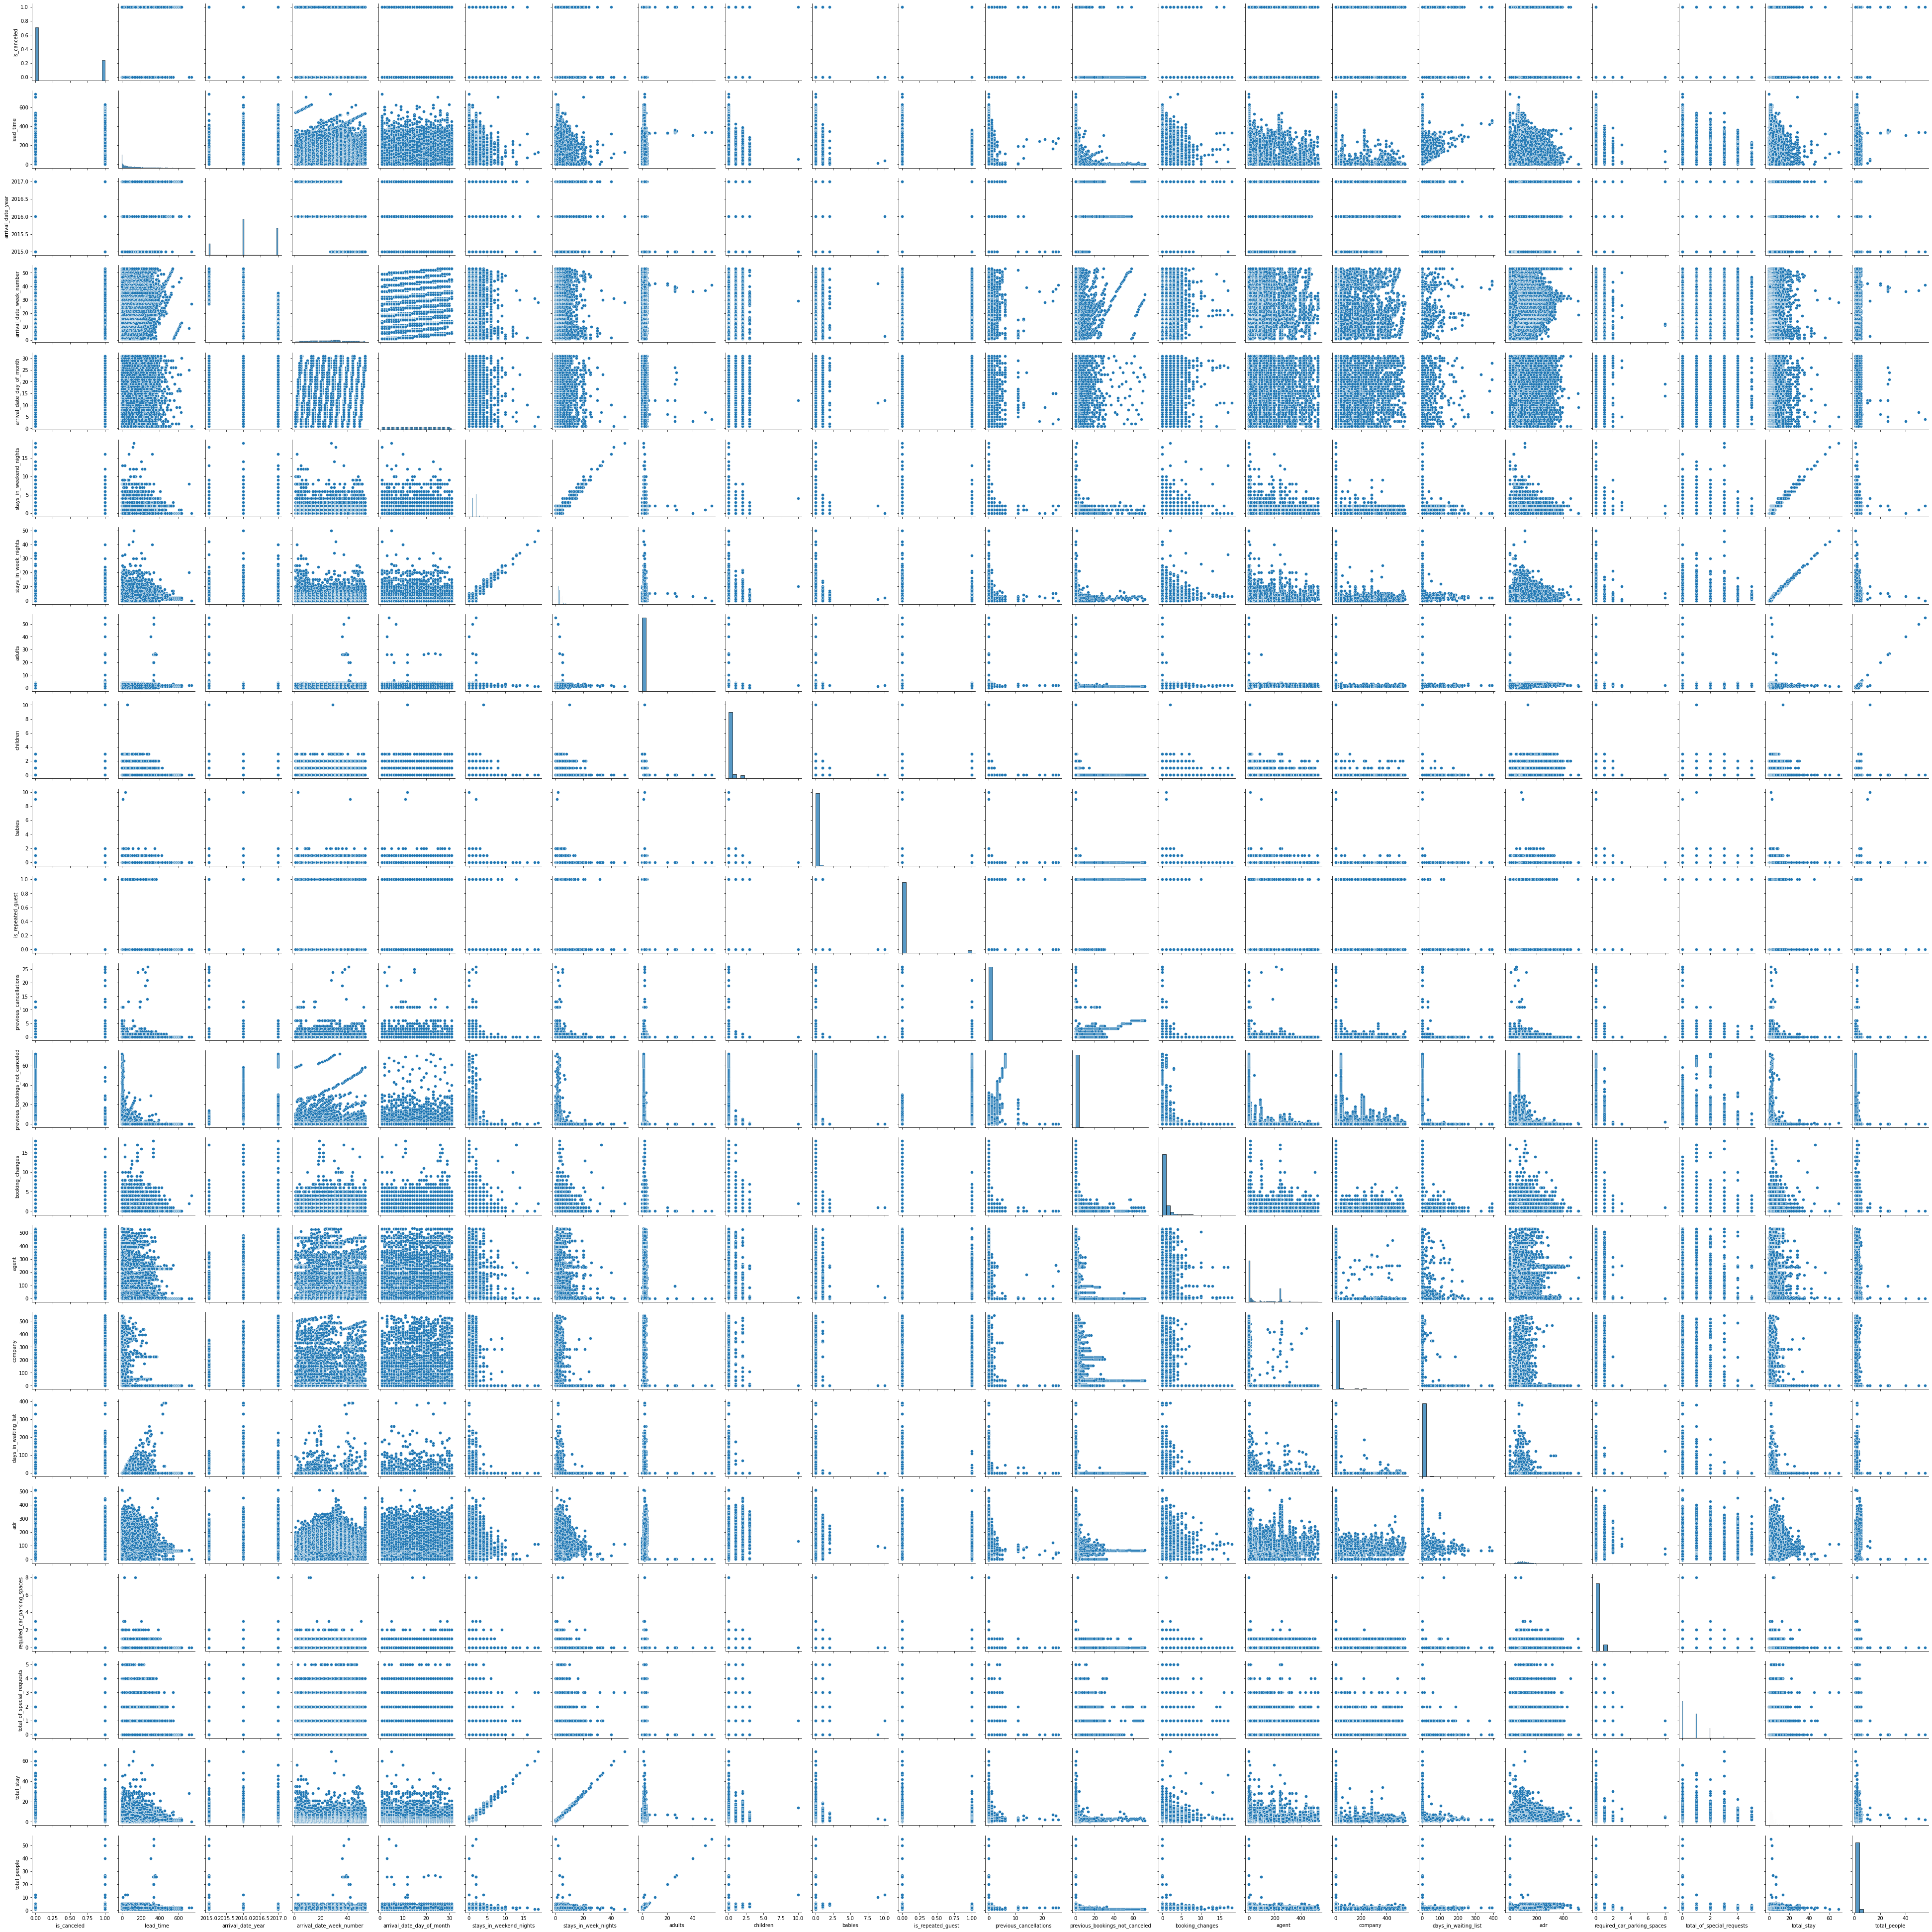

In [ ]:
sns.pairplot(hotel_c)

# ***Summary***

---



The hotel industry is any types or forms of business relating to the provision of accommodation in lodging, food and drinks and various types of other services that are interconnected and which are intended for public service, both of which use the lodging facilities or who simply use the services or the production of certain of the hotel.
Hotels offer enormous range of guests’ services such as banqueting, conference and fitness, sport and facilities, beauty spas, bars, sophisticated restaurant, casinos, night clubs and casinos. The Hotel sector consists of more than 15% of all the people who worked in the hospitality sector. Hotels falls into a number of different categories which includes the glamorous five-star resort international luxury chains, trendy boutiques, country house, conference, leisure or guest houses.
For the first step, we performed Data wrangling to clean and remove ambiguity in the data (if any). Further, we defined our problem statement and then, set the agenda to work for. 
In the second step, we did a proper detailed observation of our data and defined the exact meaning of our variables in the data. Then, we chose the crucial columns required for our data summary. Also, we planned our roadmap like ETL pipeline to reach our goal i.e. solution of problem statement. 
During Univariate Analysis, we mainly focused on the choice and attractions of the customers for booking a room. Through which, we came to conclusion wrt preferred meal or room type demand.
During Hotel wise Analysis, we focused upon revenue generation as well booking cancellation issues. Based on this analysis, we answered things like higher booking cancellations rate, etc.
During Distribution channel wise Analysis, as the name suggests, we constrained ourselves to various info related to distribution channels and how to improve them. Similarly, in Booking cancellation analysis, we focused on cancellation reasons and how to tackle them.
During Time wise Analysis, we analyzed the bookings month-wise too. Also, we answered few more questions like optimal stay length, and special requests, etc.


## **Ask and Answer Questions**

---



---



---



This is the in-toto graph taking two pairs at a time. 

From the picture above, we can observe the variations in each plot. The plots are in matrix format where the row name represents x axis and column name represents the y axis. The main-diagonal subplots are the univariate histograms (distributions) for each attribute.



While doing hotel-wise analysis of given hotel booking dataset, we answered following questions:



1.    Percentage of bookings in each hotels?
2.    Which hotel makes more revenue?

1.   Which hotel has higher lead time?
2.   What is most preferred stay length in each hotel?

1.    For which hotel, does people have to wait longer to get a booking confirmed?
2.   Which hotel has higher booking cancellations rate?
1.    Which hotel have higher and how much customer returning rate? italicized text










# **Conclusions**

---



---



---



*   The City hotels are more busier than Resort hotels with having 60% of participation in the bookings, while resort hotels have a particiaption of 40%.

*   It is clear from the above datas that city hotels make more revenue than others.

*   Both type hotels make most of their profit from the month of July-August.

*   Most people prefer to stay at the hotels for lesser than 5 days.

*   Most of the guests came from european countries, with Portugal leading the list.

*   More number of people in guests results in more number of special requests.

*   Booking cancellation rates are high for both type of hotels.


# **Challenges**

---



---



---





(1).   There was a lot of duplicate data.


(2).   Data was present in wrong datatype format.

(3).   The choosing appropriate visualization techniques to use was difficult.


(4).    A lot of null values were there in the dataset.





